In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [55]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [57]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [60]:
# Find the most recent date in the data set.
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Show date
latest_date

('2017-08-23')

Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [61]:
# Starting from the most recent data point in the database. 
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores, sort by date
percip = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year).\
    order_by(measurement.date).all()
    
# Save the query results as a Pandas DataFrame and set the index to the date column
percip_df = pd.DataFrame(percip, columns=["Date", "Percipitation"])
percip_df.set_index("Date", inplace=True)

# Show dataframe
percip_df



,Percipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


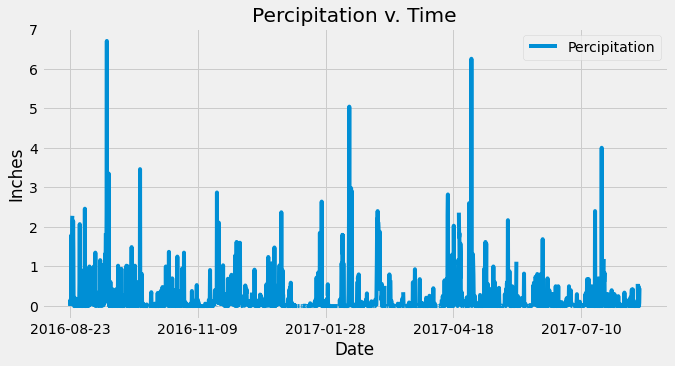

In [62]:
# Use Pandas Plotting with Matplotlib to plot the data
percip_df.plot(figsize=(10,5))
plt.title("Percipitation v. Time")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')

# Save image
plt.savefig("Images/precipitation.png")

# Show graph
plt.show()


In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(measurement.station).distinct().count()
station_count

9

In [65]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_selection = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]

selected_temp_values = session.query(*temp_selection).\
    filter(measurement.station == "USC00519281").all()

selected_temp_values

[(54.0, 85.0, 71.66378066378067)]

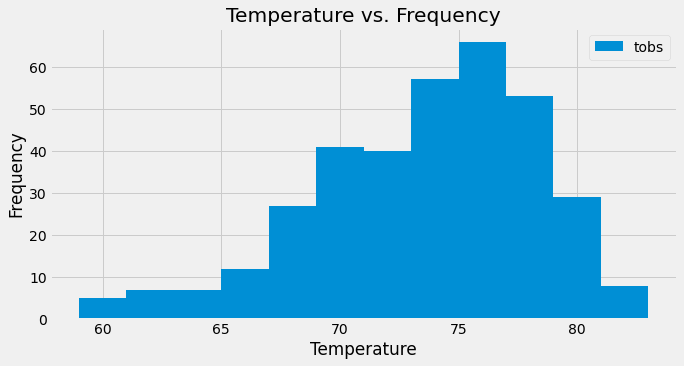

In [67]:
# Query the last 12 months of temperature observation data for the most active station & plot results as a histogram
temp_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

# Save into DataFrame
temp_df = pd.DataFrame(temp_data, columns = ["tobs"])

# Plot results
temp_df.plot.hist(bins=12, figsize=(10,5))
plt.xlabel("Temperature")
plt.title("Temperature vs. Frequency")
plt.legend(loc="upper right")

# Save image
plt.savefig("Images/temperature.png")

# Show graph
plt.show()

# BONUS: Temperature Analysis I

In [68]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [69]:
# Convert the date column format from string to datetime
df["date"] = pd.to_datetime(df["date"])

In [70]:
# Set the date column as the DataFrame index, drop the date column
df.set_index("date", inplace=True)
df

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [71]:
# Filter data for desired months to compare June and December across all years
june_df = df[df.index.month.isin([6])]
dec_df = df[df.index.month.isin([12])]

In [72]:
# Identify the average temperature for June
avg_june_temp = june_df["tobs"].mean()
avg_june_temp

74.94411764705882

In [73]:
# Identify the average temperature for December
avg_dec_temp = dec_df["tobs"].mean()
avg_dec_temp

71.04152933421226

In [74]:
# Create collections of temperature data
june = june_df["tobs"]
dec = dec_df["tobs"]

In [75]:
# Run paired t-test
t = stats.ttest_ind(june, dec)

display(t)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

Analysis¶
Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

A paired t-test is ideal for this analysis because the data compares temperatures for the same locations, though they are taken at separate times.

# BONUS 2

In [76]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2017-08-01', '2017-08-07'))

[(72.0, 79.25, 83.0)]


In [77]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax for a year in the data set
aug_trip = calc_temps('2017-08-01', '2017-08-07')
aug_trip_df = pd.DataFrame(aug_trip, columns=['tmin', 'tavg', 'tmax'])
aug_trip_df

,tmin,tavg,tmax
0,72.0,79.25,83.0


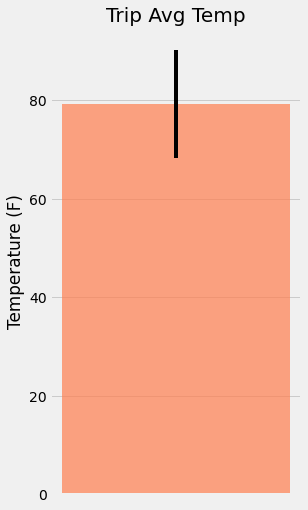

In [78]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.0))
xvalue = 1
yvalue= aug_trip_df["tavg"]
yerr = aug_trip_df["tmax"]-aug_trip_df["tmin"]

bar = ax.bar(xvalue, yvalue, alpha=0.7, color='coral', yerr=yerr)
ax.set(xticks=range(xvalue), xticklabels="a")
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temperature (F)")

# Save image
plt.savefig("Images/trip_avg_temp.png")

# Show figure
plt.show()

In [79]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def precip(start_date, end_date):
    selection = [measurement.station, station.name, station.latitude, station.longitude, station.elevation, measurement.prcp]

    return session.query(*selection).\
                filter(measurement.station == station.station).filter(measurement.date >= start_date).filter(measurement.date <= end_date).group_by(measurement.station).order_by(measurement.prcp.desc()).all()
print(precip('2017-08-01', '2017-08-07'))

[('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, None)]


In [80]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("08-01")

[(67.0, 75.54, 83.0)]

In [81]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Use the start and end date to create a range of dates
trip = pd.date_range(start_date, end_date)

# Strip off the year and save a list of strings in the format %m-%d
trip_dates = trip.strftime("%m-%d")

# Loop through the list and calculate the normals for each date
normals = []
for date in trip_dates:
    normals.append(*daily_normals(date))
list(normals)

NameError: name 'start_date' is not defined

In [82]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"])
trip_df["Date"] = trip_dates
trip_df.set_index(["Date"], inplace=True)
trip_df

NameError: name 'normals' is not defined

In [83]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind="area", stacked=False, x_compat=True, figsize=(10,5), alpha=0.5)
plt.ylabel("Temperature (F)")

# Save image
plt.savefig("Images/daily_normals.png")

# Show chart
plt.show()

NameError: name 'trip_df' is not defined

# Close session

In [84]:
# Close Session
session.close()